# Die Binomialverteilung 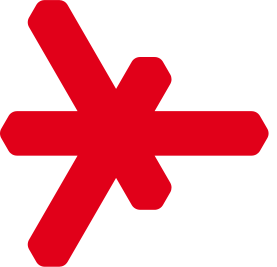
Endlich mal wieder ein Python-Notebook! Hier werden Sie die Binomialverteilung besser kennenlernen.

## 1. Naive Implementierung

$X$ sei eine binomialverteilte Zufallsvariable. Implementieren Sie die Funktion *binomial(n, p)*, die - gegeben eine Anzahl von Versuchen $n$ und eine Erfolgswahrscheinlichkeit $p$ - ein Numpy-Array $P$ der Länge $(n+1)$ mit den Wahrscheinlichkeiten $P(X=0), P(X=1), ..., P(X=n)$ zurückgibt.

Implementieren Sie zunächst die Standard-Formel aus den Slides:
$$
P(X=k) = \binom{n}{k} \cdot p^k \cdot (1-p)^{n-k}
$$
Nutzen Sie <a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.special.binom.html">scipy.special.binom()</a> zur Berechnung des Binomialkoeffizienten.
Berechnen Sie $P$ und plotten Sie es mit der unten definierten Methode *barplot()*. Variieren Sie $n=3,10,100$ und $p=0.1, 0.5, 0.99$. Sehen die Werte vernünftig aus?

> Variationen liefern Graphen ähnlich der Slides aus der VL

<IPython.core.display.Javascript object>


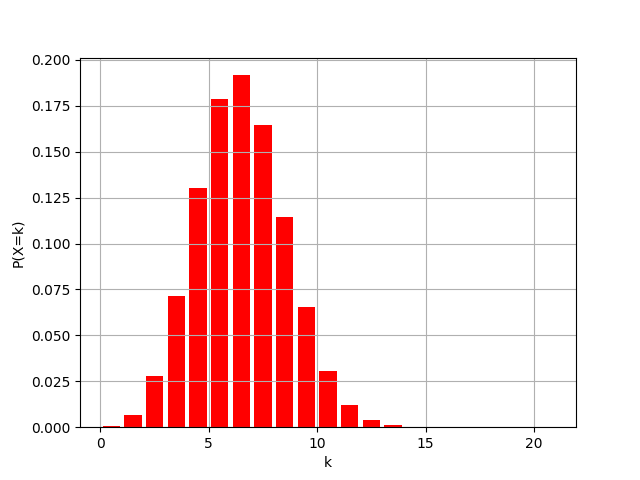

In [4]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

def binomial(n, p):
    return np.stack(
        (binom(n,k) * p**k * (1-p)**(n-k))
        for k in range(n+1))

def barplot(P):
    ind = np.arange(0,len(P))
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind+0.5, P, 0.8, color='red')
    ax.set_ylabel('P(X=k)')
    ax.set_xlabel('k')
    plt.grid(True)
    plt.show()


P = binomial(20, 0.3)
barplot(P)

# 2. Anwendung: Bauteile prüfen

In einer Fabrik werden mit einer Ausschussrate von 1.5% Bauteile produziert. Es werden 10,000 Bauteile geprüft. $X$ sei die Anzahl der defekten Bauteile. Wir berechnen in der folgenden Zelle mit Hilfe der obigen Methode **binomial()** die Wahrscheinlichkeit, dass mehr als 150 Bauteile defekt sind *(siehe unten)*.

Wir erhalten als Ergebnis "nan" *(not a number)*. Erläutern Sie warum.

In [6]:
P = binomial(10000, 0.015)
print(sum(P[151:]))

print((P[130:180]))


nan
[0.00853154 0.00978877 0.01114506 0.01259259 0.01412051        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        nan        nan]


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


## Erläuterung

> Die Zahlen innerhalb der binomial()-Funktion werden zu groß/klein für den float-Datentyp.  
Somit ergibt sich zwischen den darstellbaren Zahlen und den nan's ein Bereich mit inf als Ergebnis. Dieser entsteht weil die binom()-Funktion bei zu großen Werten inf zurückgibt.  
Der NaN bereich entsteht dann einige k's später, weil dann die $p^k$ zu klein (d.h. $=0$) werden. Die Berechnung `float("inf") * 0` ergibt dann `nan`.

## 3. Rekursionsformel

Implementieren Sie nun eine zweite Methode *binomial_recursive()*, die die Rekursionsformel für die Binomialverteilung verwendet *(siehe Vorlesung)*. 

* Hinweis: Denken Sie daran, P[0] mit $P(X=0)$ zu initialisieren.
* Überprüfen Sie per Barplot, dass Ihr Ergebnis immer noch korrekt ist.
* Testen Sie das Fabrikbeispiel aus Teil 2. Erhalten Sie nun ein plausibles Ergebnis?


<IPython.core.display.Javascript object>


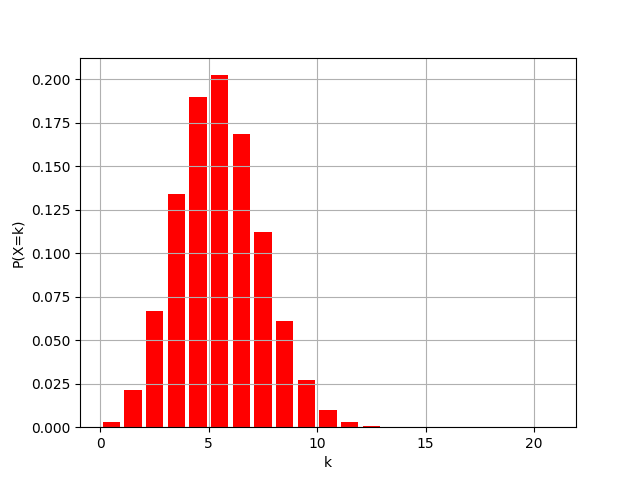

0.478302200591721


In [3]:
import numpy as np
import sys

# recursive - less performant
def binomial_recursive(n, p, start=-1, k=0):
    if(start == -1):
        sys.setrecursionlimit(max(n + 100,1500))
        start = (1-p)**n # calc P(X=0)
    yield start # always return the start (base) value
    if(k < n): # recurse if k < n
        yield from binomial_recursive(n, p, 
            start * (p/(1-p)) * ((n-k)/(k+1)), k+1)

# iterative - more performant
def binomial_iterative(n, p):
    P = np.ones(n+1)
    P[0] = (1-p)**n
    for k in range(n):
        P[k+1] = P[k] * (p/(1-p)) * ((n-k)/(k+1))
    return P
             

# Einfacher Test
barplot(list(binomial_recursive(20, 0.25)))

# Komplizierterer Test -> sollte nun klappen.
P = list(binomial_iterative(10000, 0.015))
print(sum(P[151:]))


